In [1]:
#We import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

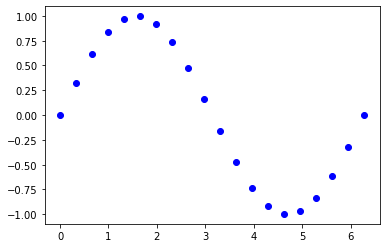

In [2]:
#We create our dataset
x_train=np.linspace(0,np.pi*2,20)
yd_train=np.array(np.sin(x_train))
plt.plot(x_train,yd_train,'bo')
plt.show()

In [3]:
#We create our model
model=keras.models.Sequential()
model.add(keras.layers.Dense(10,input_shape=(1,),activation='tanh'))
#model.add(keras.layers.Dense(10,activation='tanh'))
model.add(keras.layers.Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


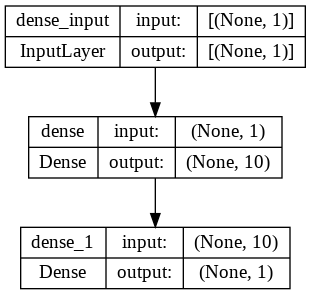

In [4]:
#Model display
keras.utils.plot_model(model, "RNA_Sinus.png", show_shapes=True)

In [5]:
#Set optimizers and model metrics
model.compile(keras.optimizers.Adam(),'mse',metrics=['mse'])


In [6]:
#Training
hist=model.fit(x_train,yd_train,epochs=10000,verbose=0)

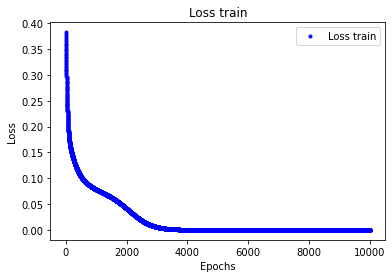

In [7]:
#Loss training
loss_train = hist.history['loss']
epochs = range(1, len(loss_train) + 1)

plt.plot(epochs, loss_train, 'b.', label='Loss train')
plt.title('Loss train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
model.evaluate(x_train,yd_train)

1/1 [==============================] - 0s 132ms/step - loss: 6.4611e-07 - mse: 6.4611e-07


[6.461081625275256e-07, 6.461081625275256e-07]

1/1 [==============================] - 0s 77ms/step


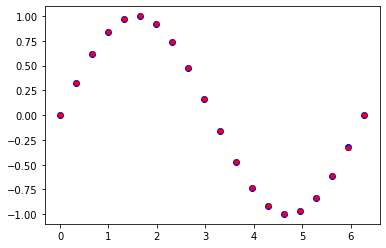

In [9]:
#Prediction
yd_pred=model.predict(x_train)
plt.plot(x_train,yd_train,'bo',x_train,yd_pred,'r*')
plt.show()

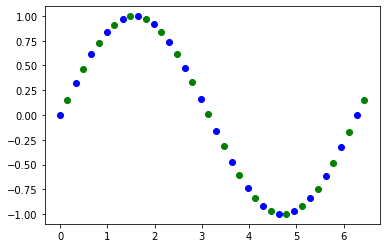

In [10]:
#validation and train data
xval=np.linspace(np.pi*0.05,np.pi*2+np.pi*0.05,20)
yval=np.array(np.sin(xval))
plt.plot(x_train,yd_train,'bo',xval,yval,'go')
plt.show()

1/1 [==============================] - 0s 15ms/step


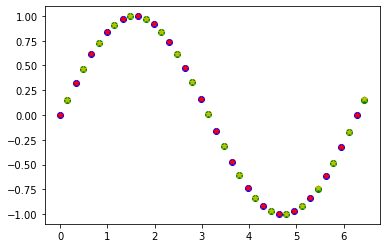

In [11]:
#train and prediction and validation data
predval=model.predict(xval)
plt.plot(x_train,yd_train,'bo',x_train,yd_pred,'r*',xval,yval,'go',xval,predval,'y*')
plt.show()

In [12]:
#Weights hidden layer
Whl = model.layers[0].get_weights()[0]
print(Whl.shape)
print(Whl)
#Bias hidden layer
bhl = model.layers[0].get_weights()[1]
print(bhl.shape)
print(bhl)


(1, 10)
[[-0.4174775  -0.6488396  -0.58007306 -0.55784994 -0.56935644  0.5431235
  -0.5483039   0.6593595  -0.64934283  0.5620996 ]]
(10,)
[ 2.5058367   1.9462922   2.3047347   0.61464566  0.55358803 -0.81579876
  0.51419157 -0.7602218   0.008545   -0.5992757 ]


In [13]:
#Weights output layer
Wol = model.layers[1].get_weights()[0]
print(Wol.shape)
print(Wol)
#Bias output layer
bol = model.layers[1].get_weights()[1]
print(bol.shape)
print(bol)

(10, 1)
[[-3.1059668 ]
 [ 0.87310827]
 [ 1.4746506 ]
 [ 0.5895967 ]
 [-1.0854738 ]
 [-1.1903589 ]
 [ 0.6692502 ]
 [ 1.551415  ]
 [-1.720885  ]
 [-0.6815683 ]]
(1,)
[0.5311719]
